Insurance Prediction using Naive Bayes Theorem

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_recall_curve , f1_score

In [21]:
# Read dataset
df_net = pd.read_csv('Social_Network_Ads.csv')
df_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [23]:
# Describe data
df_net.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


C:\Users\maila\AppData\Local\Temp\ipykernel_14156\3065556443.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

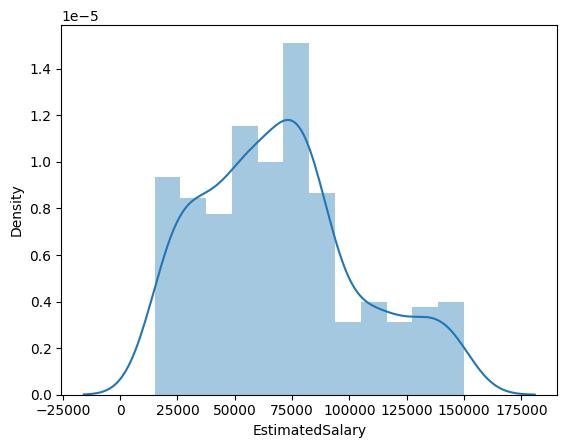

In [24]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [25]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

<Axes: >

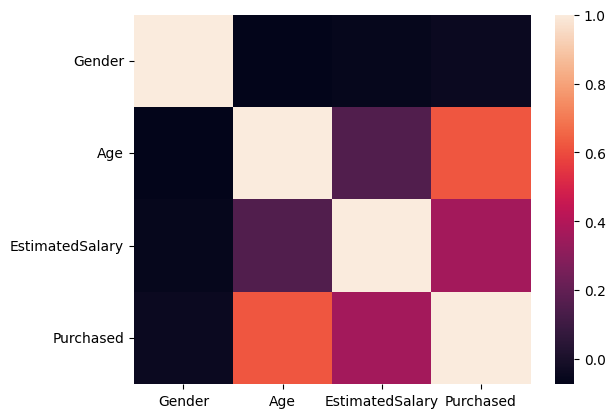

In [26]:
# Correlation matrix
df_net.corr()
sns.heatmap(df_net.corr())

In [27]:
# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)


In [28]:
# Split data into dependent/independent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [29]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [30]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [32]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [33]:
# Accuracy
accuracy_score(y_test, y_pred)

0.86

In [34]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [35]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8333333333333334


<Axes: >

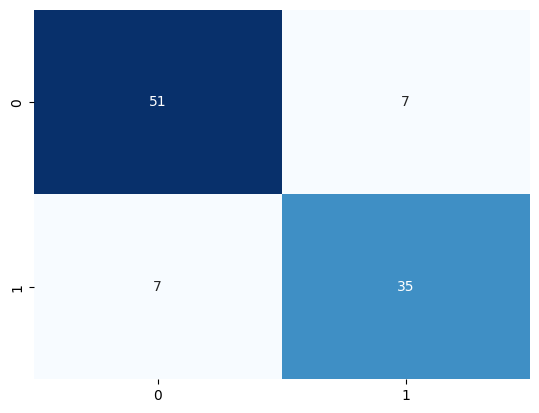

In [36]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [37]:
# Predict purchase with Age(45) and Salary(97000)
print(classifier.predict(sc.transform([[45, 97000]])))

[1]
